In [4]:
import sys

import matplotlib.pyplot as plt
import numpy as np
import glob

In [5]:
PER_plot = []
SNR_plot = []
path = "*.txt"
static_CFO_corr = 0

for filename in glob.glob(path):
    SNR_list = []
    packet_received_list = []
    packet_error_list = []
    CFO_list = []
    PER_list = []
    with open(filename, encoding="ISO-8859-1") as openfileobject:
        for line in openfileobject:
            # SYNCHRONIZATION MESSAGE
            if line[0:6] == "[SYNC]":
                # print(line)
                if line[0:21] == "[SYNC] Estimated SNR:":  # recover estimated SNR
                    try:
                        SNR = float(line[22:28].split('.')[0])
                    except:
                        SNR = float(line[22:26].split('.')[0])
                    # print(SNR)
                    SNR_list.append(SNR)

                elif line[0:28] == "[SYNC] New preamble detected":  # recover estimated CFO
                    possibility_prev = ""
                    for possibility in line.split():
                        try:
                            number = float(possibility.replace(",", "."))
                            if not (
                                possibility_prev == "@"
                            ):  # since several numbers in the same line, make sure extract CFO
                                CFO_list.append(number)
                                # print(number)
                        except ValueError:
                            pass
                        possibility_prev = possibility

            # PER MESSAGE
            elif line[0:4] == "--- ":
                # print(line)
                list_int = [int(s) for s in line.split() if s.isdigit()]
                packet_received_list.append(list_int[0])
                packet_error_list.append(list_int[1])
                #PER = list_int[1]/list_int[0]
                #print(PER)
                #PER_list.append(PER)


    CFO_list = np.array(CFO_list) + static_CFO_corr

    SNR_mean = np.mean(SNR_list)
    SNR_std = np.std(SNR_list)

    PER_plot.append(packet_error_list[-1]/packet_received_list[-1])
    SNR_plot.append(SNR_mean)

PER_plot = np.array(PER_plot)
SNR_plot = np.array(SNR_plot)

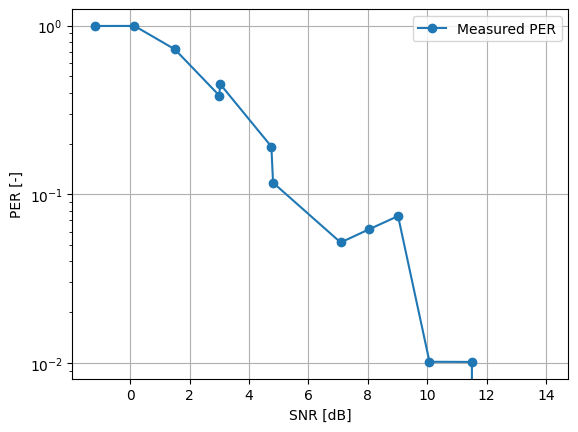

In [6]:
indices = np.argsort(SNR_plot)


SNR_mes = SNR_plot[indices]
PER_mes= PER_plot[indices]


plt.semilogy(SNR_mes,PER_mes, 'o-', label= "Measured PER")
plt.xlabel("SNR [dB]")
plt.ylabel("PER [-]")
plt.legend()
plt.grid()
plt.show()

[-1.19302326  0.13737374  1.49500998  2.99593496  3.02376238  4.74949084
  4.80645161  7.08349901  8.02988048  9.01803607 10.07707911 11.50607287
 14.        ]
[0.995338   0.99595142 0.724      0.38492872 0.45039683 0.19183673
 0.11717172 0.05179283 0.06187625 0.07429719 0.0101626  0.
 0.        ]
9.026651101509506


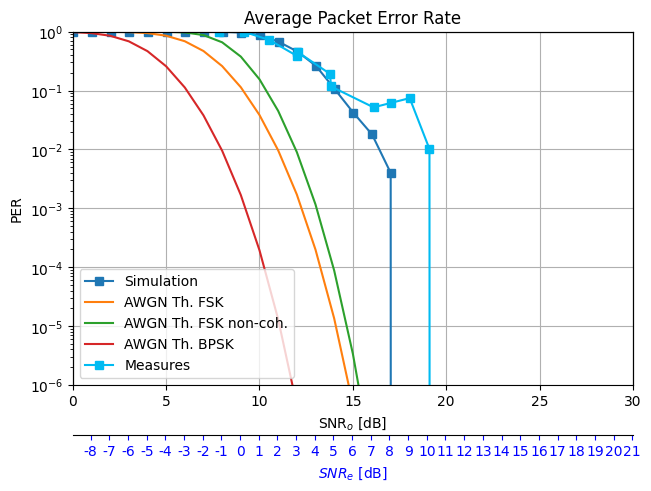

In [11]:
# Theoretical curves

SNR_th = np.load("PER curve - SNR axis - SNR_th.npy")
SNRs_dB = np.load("PER curve - SNR axis - SNRs_dB.npy")
SNR_e = np.load("PER curve - SNR axis - SNR_e.npy")

shift_SNR_out = np.load("PER curve - SNR axis - shift_SNR_out.npy")
shift_SNR_filter = np.load("PER curve - SNR axis - shift_SNR_filter.npy")

SNR_simu = np.load("PER curve - SNR axis - SNR_simu.npy")
PER_Th_BPSK = np.load("Th PER curve - AWGN Th. BPSK.npy")
PER_Th_FSK = np.load("Th PER curve - AWGN Th. FSK.npy")
PER_Th_FSK_noncoh = np.load("Th PER curve - AWGN Th. FSK non-coh.npy")
PER_Simu = np.load("PER curve - Simulation.npy")

fig, ax = plt.subplots(constrained_layout=True)

ProcessBlue = "#00BBF2"



print(SNR_mes)
print(PER_mes)
# Retrieves 5 erros in 11dB : systematic
PER_mes[-2] = 0


ax.plot()

ax.plot(SNR_simu, PER_Simu, "-s", label="Simulation")
ax.plot(SNR_th, PER_Th_FSK, label="AWGN Th. FSK")
ax.plot(SNR_th,PER_Th_FSK_noncoh,label="AWGN Th. FSK non-coh.")
ax.plot(SNR_th, PER_Th_BPSK, label="AWGN Th. BPSK")
ax.plot(SNR_mes+shift_SNR_out, PER_mes, "-s", color=ProcessBlue, label="Measures")
ax.set_ylabel("PER")
ax.set_xlabel("SNR$_{o}$ [dB]")
ax.set_yscale("log")
ax.set_ylim((1e-6, 1))
ax.set_xlim((0, 30))
ax.grid(True)
ax.set_title("Average Packet Error Rate")
ax.legend(loc="lower left")

ax2 = ax.twiny()
# ax2.set_xticks(SNR_simu)
ax2.set_xticks(SNR_e)
ax2.set_xticklabels(SNRs_dB)
ax2.xaxis.set_ticks_position("bottom")
ax2.xaxis.set_label_position("bottom")
ax2.spines["bottom"].set_position(("outward", 36))
# ax2.set_xlabel('SNR [dB]')
ax2.set_xlabel(r"$SNR_e$ [dB]")
ax2.set_xlim(ax.get_xlim())
ax2.xaxis.label.set_color("b")
ax2.tick_params(axis="x", colors="b")
plt.savefig("PER_SNR_Th_Sim_Meas.pdf")
print(shift_SNR_out)
